In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cleaning_scripts import prepare_data_for_roi_analysis
from cleaning_scripts import clean_data_prepare_features

%matplotlib inline

### Import data, clean data, and do some feature engineering 

In [3]:
df = prepare_data_for_roi_analysis()
df = clean_data_prepare_features(df)
print('Shape:', df.shape)
df.head()

Percent of rows left after first merge: 0.5053645719290563
Percent of rows left after second merge: 0.03886237986455621
Shape: (2875, 12)


,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,net_revenue,log_numvotes,scaled_rating
16,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,45000000,0,73706,-44.926294,9.017726,0.134911
33,The Overnight,2010,88.0,NaN,7.5,24.0,200000,1109808,1165996,0.965996,3.178054,0.187680
41,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,25000000,720828,9313302,-15.686698,10.542337,0.506364
47,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,91000000,58236838,187861183,96.861183,12.525617,0.719976
51,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,28000000,26017685,62108587,34.108587,11.562820,0.591798


### Plotting Movie Popularity vs. ROI

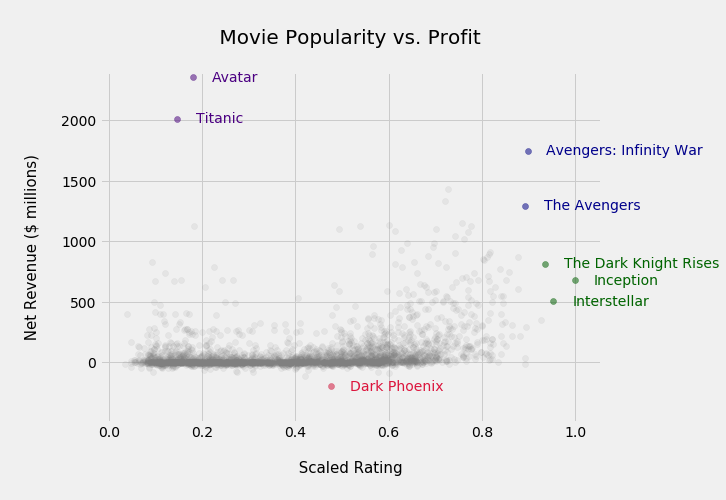

In [4]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

top_left = df[(df.net_revenue > 2000)]
top_right = df[(df.net_revenue > 1000) & (df.scaled_rating > 0.8)]
far_right = df[(df.net_revenue > 500) & (df.scaled_rating > 0.9)]
bottom = df[(df.net_revenue < -200)]

ax.scatter(df.scaled_rating, df.net_revenue, alpha=0.1, color='grey')
ax.scatter(top_left['scaled_rating'], top_left['net_revenue'], color='indigo', alpha=0.5)
ax.scatter(top_right['scaled_rating'], top_right['net_revenue'], color='darkblue', alpha=0.5)
ax.scatter(far_right['scaled_rating'], far_right['net_revenue'], color='darkgreen', alpha=0.5)
ax.scatter(bottom['scaled_rating'], bottom['net_revenue'], color='crimson', alpha=0.5)

for i, row in top_left.iterrows():
    plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='indigo')
for i, row in top_right.iterrows():
    plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='darkblue')
for i, row in far_right.iterrows():
    plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='darkgreen')
for i, row in bottom.iterrows():
    plt.text(row.scaled_rating+.04, row.net_revenue-30, row.primary_title, color='crimson')

ax.set_title('\n Movie Popularity vs. Profit \n', size=20)
ax.set_xlabel('\n Scaled Rating \n', size=15)
ax.set_ylabel('\n Net Revenue ($ millions) \n', size=15)
ax.set_ylim(-490, 2400);